# SOS25 - SOM - Group 21


## Group 21
- [ ] Martin Kowarik 01634081
- [ ] Matthias Frenzl 00753306

## Data Repository: 
- [ ] Dataset at OpenML.org: [one-hundred-plants-shape](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfInstances=between_1000_10000&id=1492)
- [ ] Dataset Meta Data: dataset_1492_croissant.json
- [ ] Machine-actionable Dataset Description: php0FyS2T.arff

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json
from starvers.starvers import TripleStoreEngine
import seaborn as sns
from scipy.io import arff
import json
from rdflib import Graph, Namespace, URIRef, Literal, BNode
from rdflib.namespace import RDF, RDFS, XSD, DCTERMS
from sklearn.preprocessing import MinMaxScaler

## Prov-O Documentation

In [2]:
executed_by ='stud-id_01634081'  # Replace the digits after "id_" with your own student ID

# group id for this project
group_id = '21'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_01634081'  # Replace the digits after "id_" with student A's student ID
student_b = 'stud-id_00753306'  # Replace the digits after "id_" with student B's student ID

# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/',
}

def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

In [3]:
# Ontologies used: foaf, prov, IAO
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Martin" .',
f':{student_a} foaf:familyName "Kowarik" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "01634081"^^xsd:string .',
]

reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Matthias" .',
f':{student_b} foaf:familyName "Frenzl" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "Immatriculation number" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "00753306"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

# Task Create a machine-actionable description of the dataset 
- [ ] following Croissant / Schema.org descriptions for datasets 
  - [ ] Croissant: https://neurips.cc/virtual/2024/poster/97627, https://docs.mlcommons.org/croissant/docs/croissant-spec.html; 
  - [ ] schema.org: https://schema.org/Dataset, 
  - [ ] JSON example provided at https://schema.org/Dataset#eg-0478)
  
Note: Task already done, as we have a dataset that is already in the right format.

In [4]:
# Filling the Data Frame

image_output_dir = 'figures'
dataset_path = "" # File has to be in the same directory as the notebook
file_name = 'php0FyS2T.arff' # Note: Filename in .arff format 

def load_arff_data() -> pd.DataFrame:
    input_file = os.path.join(dataset_path, file_name) 
    raw_data, meta = arff.loadarff(input_file)
    dataframe = pd.DataFrame(raw_data)

    def clean_data(df: pd.DataFrame):
        if 'Class' in df.columns and df['Class'].dtype == object: # Convert original string values (in case they were wrongly importated as "byte") back to to string or integer
             df['Class'] = df['Class'].str.decode('utf-8').astype(int)
        return df

    loaded_data = dataframe
    loaded_data = clean_data(loaded_data)
    
    return loaded_data

df = load_arff_data()

display(df.head())

start_time_ld = now()
data = load_arff_data()
end_time_ld = now()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,Class
0,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,0.000594,...,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614,13
1,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,0.000546,...,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667,13
2,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,0.000530,...,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602,13
3,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,0.000600,...,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603,13
4,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,0.000596,...,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594,13


# Task: Analyze and describe the characteristics of the dataset

- [ ] Analyze and describe the characteristics of the dataset 
  - [ ] size, 
  - [ ] attribute types as discussed in class, 
  - [ ] value ranges, 
  - [ ] sparsity, 
  - [ ] min/max values, 
  - [ ] outliers, 
  - [ ] missing values, 
  - [ ] correlations, ...
- [ ] **Provenance Graph:** Describe this in the provenance graph. 
- [ ] **RDF:** Also, describe any hypotheses you might have concerning the 
  - [ ] distribution of the data, 
  - [ ] number of clusters and their relationship, 
  - [ ] majority/minority classes as rdf comment field in the provenance graph.

Number of instances & Attributes:
Number of instances: 1600
Number of attributes: 65

Attributes
float64    64
int64       1
Name: count, dtype: int64

Missing Values
Number of missing values: 0

Value Ranges


,min,max,mean,std,range
V1,0.000168,0.002390,0.000737,0.000270,0.002222
V2,0.000182,0.002247,0.000715,0.000265,0.002065
V3,0.000148,0.002112,0.000690,0.000258,0.001964
V4,0.000104,0.001998,0.000667,0.000252,0.001894
V5,0.000120,0.002151,0.000646,0.000250,0.002031



Sparsity
Sparsity: 0.00%

Class Distribution
Number of Classes: 100
Min size: 16
Max size: 16


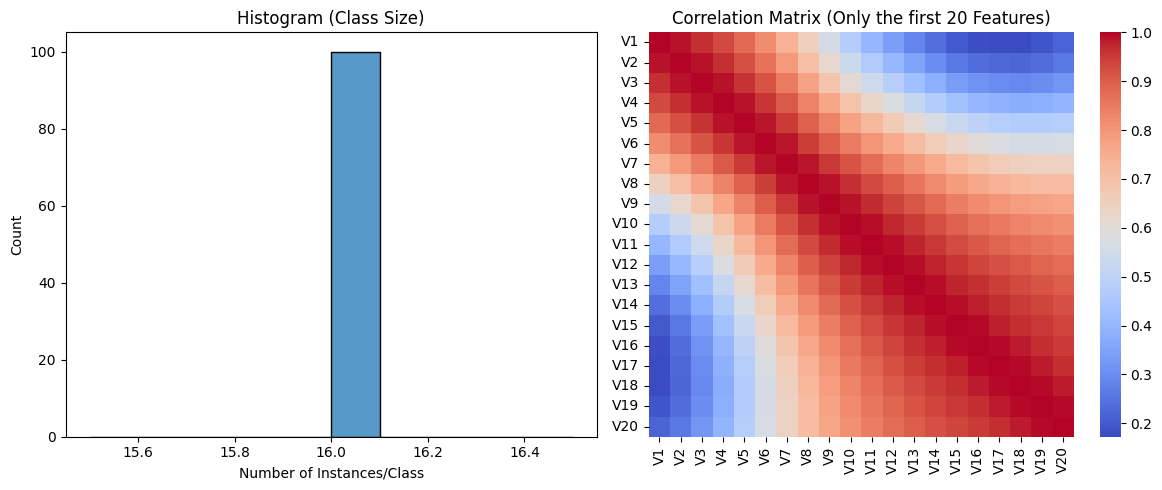

In [5]:
# Data Analysis

def analyze_dataset(df: pd.DataFrame):
    print("Number of instances & Attributes:")
    n_instances, n_attributes = df.shape
    print(f"Number of instances: {n_instances}")
    print(f"Number of attributes: {n_attributes}")
    
    # Note: Are there any Class Attributes?
    if 'Class' not in df.columns:
        target_col = df.columns[-1]  # Note: Sometimes the target is the last column just with another  name
        print(f"Target column: '{target_col}'")
    else:
        target_col = 'Class'
       
    print(f"\nAttributes")
    print(df.dtypes.value_counts())
    print("\nMissing Values")
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    print(f"Number of missing values: {total_missing}")
    if total_missing > 0:
        print(missing_counts[missing_counts > 0])
    print("\nValue Ranges")
    numeric_df = df.select_dtypes(include=[np.number])
    stats = numeric_df.describe().T
    stats['range'] = stats['max'] - stats['min']
    display(stats[['min', 'max', 'mean', 'std', 'range']].head())
    print("\nSparsity")
    zero_counts = (numeric_df == 0).sum().sum()
    total_cells = numeric_df.size
    sparsity = zero_counts / total_cells
    print(f"Sparsity: {sparsity:.2%}")
    print("\nClass Distribution")
    class_counts = df[target_col].value_counts()
    print(f"Number of Classes: {len(class_counts)}")
    print(f"Min size: {class_counts.min()}")
    print(f"Max size: {class_counts.max()}")
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    if len(class_counts) > 20:
        sns.histplot(class_counts, bins=10, kde=False)
        plt.title('Histogram (Class Size)')
        plt.xlabel('Number of Instances/Class')
    else:
        sns.barplot(x=class_counts.index, y=class_counts.values)
        plt.title('Class Distribution')
        
    plt.subplot(1, 2, 2)
    corr_matrix = numeric_df.iloc[:, :20].corr() 
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix (Only the first 20 Features)')
    plt.tight_layout()
    save_path = os.path.join(image_output_dir, 'Task0_DataAnalysis.png')
    plt.savefig(save_path)
    plt.show()

    return stats, class_counts

stats, class_counts = analyze_dataset(df)


In [6]:
## Each Activity that follows is part of the Data Understanding Phase

data_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', 
]
engine.insert(data_understanding_phase_executor, prefixes=prefixes)

In [7]:
#############################################
# Documentation
#############################################

# Now document the raw data and the loaded data using appropriate ontologies.
load_plants_data_code_writer = student_a

# Always add these triples for every activity to define the executor!
ld_ass_uuid_executor = "b8bac193-c4e6-4e31-9134-b23e001e279c" # Generate once
load_plants_data_executor = [
    f':load_plants_data prov:qualifiedAssociation :{ld_ass_uuid_executor} .',
    f':{ld_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ld_ass_uuid_executor} rdf:type prov:Association .',
    f':{ld_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(load_plants_data_executor, prefixes=prefixes)

ld_ass_uuid_writer = "c600e15c-87a9-4e2a-be85-b6c2a3014210" # Generate once
ld_report = """
Load all plants data. 
"""
load_plants_data_activity = [
    ':load_plants_data_activity rdf:type prov:Activity .',
    ':load_plants_data_activity sc:isPartOf :data_understanding_phase .',
    ':load_plants_data_activity rdfs:comment \'Data Understanding\' .',
    f':load_plants_data_activity rdfs:comment """{ld_report}""" .', 
    f':load_plants_data_activity prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':load_plants_data_activity prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',
    f':load_plants_data_activity prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_plants_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    # INPUT of activity
    ':load_plants_data_activity prov:used :raw_data .',
    ':load_plants_data_activity prov:used :raw_data_path .',
    ':raw_data rdf:type prov:Entity .',
    ':raw_data_path rdf:type prov:Entity .',
    ':raw_data prov:wasDerivedFrom :raw_data_path .',
    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_plants_data_activity .',
    ':data prov:wasDerivedFrom :raw_data .',
]
engine.insert(load_plants_data_activity, prefixes=prefixes)

# Further descibe the raw data using Croissant
raw_data_triples = [
    ':raw_data rdf:type sc:Dataset .',
    ':raw_data sc:name \'Cyclist data set\' .',
    ':raw_data sc:description \'Describe the data set.\' .',
    # Continue with futher information about the dataset...
    ':cyclists_csv rdf:type cr:FileObject .',
    ':cyclists_csv sc:name \'cyclists.csv\' .',
    ':cyclists_csv sc:encodingFormat \'text/csv\' .',
    ':raw_data sc:distribution :cyclists_csv .',
    # Continue with further information about the distribution...
    ':raw_recordset rdf:type cr:RecordSet .',
    ':raw_recordset sc:name \'Table of cycling data per day\' .',
    ':raw_recordset cr:source :cyclists_csv .',
    ':raw_data cr:recordSet :raw_recordset .',
    # Continue with further information about the recordset...
    ':raw_recordset cr:field :field_date .',
    ':raw_recordset cr:field :field_number .',
    ':field_date rdf:type cr:Field .',
    ':field_date sc:name \'date\' .',
    ':field_date sc:description \'This is a date field of...\' .',
    ':field_date cr:dataType xsd:dateTime .',
    # Continue with futher information about the field...
    ':field_number rdf:type cr:Field .',
    ':field_number sc:name \'number\' .',
    ':field_number sc:description \'This field describes..\' .',
    ':field_number cr:dataType xsd:integer .',
    # Continue with futher fields...
]
engine.insert(raw_data_triples, prefixes=prefixes)

# Also the output of the load activity is a dataset that can be described with Croissant
data_triples = [
    ':data rdf:type sc:Dataset .',
    # ...
    ':recordset rdf:type cr:RecordSet .',
    # ...
    ':data cr:recordSet :recordset .',
    # ...
    # Fields can also be reused
    ':recordset cr:field :field_date .',
    ':recordset cr:field :field_number .',
    # The loaded data has additional fields
    ':recordset cr:field :field_day_of_week .',
    ':field_day_of_week rdf:type cr:Field .',
    ':field_day_of_week sc:name \'day_of_week\' .',
    ':field_day_of_week sc:description \'Day of week description\' .',
    ':field_day_of_week cr:dataType xsd:string .',
    # This is not actually a field in the dataframe but below demonstrates how units may be used
    ':recordset cr:field :field_temp .', 
    ':field_temp rdf:type cr:Field .',
    ':field_temp sc:name \'temperature\' .',
    ':field_temp sc:description \'Description Temperature\' .',
    ':field_temp cr:dataType xsd:double .',
]
engine.insert(data_triples, prefixes=prefixes)

# Also add the units to the fields
units_triples = [
    ':field_number qudt:unit qudt:CountingUnit .',
    ':field_temp qudt:unit siu:degree_Celsius .',
]
engine.insert(units_triples, prefixes=prefixes)

ld_report = """Dataset Overview
Number of instances: 1600
Number of attributes: 65

Attribute 
float64    64
int64       1
Name: count, dtype: int64

=== Missing Values ===
Total missing values: 0

=== Value Ranges & Statistics ===
min	max	mean	std	range
V1	0.000168	0.002390	0.000737	0.000270	0.002222
V2	0.000182	0.002247	0.000715	0.000265	0.002065
V3	0.000148	0.002112	0.000690	0.000258	0.001964
V4	0.000104	0.001998	0.000667	0.000252	0.001894
V5	0.000120	0.002151	0.000646	0.000250	0.002031

Sparsity
Sparsity: 0.00%

Class Distribution (Majority/Minority)
Number of classes: 100
Min class size: 16
Max class size: 16"""
analyze_data_activity = [
    ':analyze_data_activity rdf:type prov:Activity .',
    ':analyze_data_activity sc:isPartOf :data_understanding_phase .',
    ':analyze_data_activity rdfs:comment \'Data Understanding\' .',
    f':analyze_data_activity rdfs:comment """{ld_report}""" .', 
    f':analyze_data_activity prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':analyze_data_activity prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',
    f':analyze_data_activity prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_plants_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    # INPUT of activity
    ':analyze_data_activity prov:used :raw_data .',
    ':analyze_data_activity prov:used :raw_data_path .',
    ':raw_data rdf:type prov:Entity .',
    ':raw_data_path rdf:type prov:Entity .',
    ':raw_data prov:wasDerivedFrom :raw_data_path .',
    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_plants_data_activity .',
    ':data prov:wasDerivedFrom :raw_data .',
]
engine.insert(units_triples, prefixes=prefixes)

# Task 1 - Train a reasonably sized „regular“ SOM 
- [ ] Train a SOM with „regular“ size (i.e. number of units as a certain fraction of the number of data items) and reasonable training parameters (sufficiently large initial neighborhood, learning rate; provide a justification for the selection of the parameters. 
- [ ] NOTE: Learning rates for SOMs differ from those usually encountered in Deep Neural Networks, c.f. lecture)
- [ ] Analyse in detail the class distribution, cluster structure, quantization errors, topology violations. 
    - [ ] a) Can you identify the border effect and magnification factors. 
    - [ ] b) How well do class distribution and cluster structure match? 
    - [ ] c) Which classes fall into sub-clusters, which classes are split across clusters, which classes mix in clusters. 
    - [ ] d) How is the quantization error distributed on the map, how does this correspond with perceived cluster separation and quality?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

In [ ]:
# Task 1 

#  SOM Implementation 
class SimpleSOM:
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, random_seed=None):
        if random_seed:
            np.random.seed(random_seed)
        self.x = x
        self.y = y
        self.input_len = input_len
        self.sigma = sigma
        self.learning_rate = learning_rate
        
        
        # Initialize the weights
        self.weights = np.random.rand(x, y, input_len) 
        
        # Calculate the grid
        self._neigx = np.arange(x)
        self._neigy = np.arange(y) 
        self._xx, self._yy = np.meshgrid(self._neigx, self._neigy, indexing='ij')
        
    def _activate(self, x):
        """Distance from x to all weights"""
        x = x[np.newaxis, np.newaxis, :]
        return np.linalg.norm(self.weights - x, axis=2)

    def winner(self, x):
        """Best Matching Unit"""
        activation_map = self._activate(x)
        return np.unravel_index(activation_map.argmin(), activation_map.shape)

    def update(self, x, win_coords, iteration, max_iter):
        """Updating the weights"""
        
        # MiniSom decay:
        eta = self.learning_rate / (1 + iteration / (max_iter/2))
        sig = self.sigma / (1 + iteration / (max_iter/2))
        
        # Gaussian Neighborhood
        g_x, g_y = win_coords
        dist_sq = (self._xx - g_x)**2 + (self._yy - g_y)**2
        h = np.exp(-dist_sq / (2 * sig**2))
        
        h = h[:, :, np.newaxis]
        self.weights += eta * h * (x - self.weights)

    def train(self, data, num_iterations):
        """Training the map"""
        n_samples = data.shape[0]
        for t in range(num_iterations):
            
            # Samp;e
            idx = np.random.randint(0, n_samples)
            x = data[idx]
            win = self.winner(x)
            self.update(x, win, t, num_iterations)
            
    def quantization_error(self, data):
        """Avg distance to Best Matching Unit"""
        error = 0
        for x in data:
            dist = self._activate(x).min()
            error += dist
        return error / len(data)

    def distance_map(self):
        """U-Matrix - Average distance to neighbors"""
        um = np.zeros((self.x, self.y))
        for i in range(self.x):
            for j in range(self.y):
                dists = []
                if i > 0: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i-1,j]))
                if i < self.x-1: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i+1,j]))
                if j > 0: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i,j-1]))
                if j < self.y-1: dists.append(np.linalg.norm(self.weights[i,j] - self.weights[i,j+1]))
                um[i,j] = np.mean(dists)
        return um

    def activation_response(self, data):
        """Count hits per neuron"""
        hits = np.zeros((self.x, self.y))
        for x in data:
            w = self.winner(x)
            hits[w] += 1
        return hits
    
    def get_topographic_error(self, data):
        """1. and 2. Best Matching Unit adjacency"""
        err = 0
        for x in data:
            dists = self._activate(x).flatten()
            sorted_idx = np.argsort(dists)
            bmu1_idx = sorted_idx[0]
            bmu2_idx = sorted_idx[1]
            
            bmu1 = np.unravel_index(bmu1_idx, (self.x, self.y))
            bmu2 = np.unravel_index(bmu2_idx, (self.x, self.y))
            
            grid_dist = np.sqrt((bmu1[0]-bmu2[0])**2 + (bmu1[1]-bmu2[1])**2)
            if grid_dist > np.sqrt(2): 
                err += 1
        return err / len(data)



# Task: Preprocessing
- [ ] Get the data into the form needed for training SOMs. 
- [ ] Describe your preprocessing steps 
  - [ ] (e.g. transcoding, scaling), 
  - [ ] why you did it and how you did it. 
  - [ ] Specifically, if your dataset turns out to be extremely large (very high-dimensional and huge number of vectors so that it does not fit into memory for training SOMs) you may choose to apply subsampling for the training data.


In [9]:
# Data Prep

target_col = 'Class'
X = df.drop(columns=[target_col]).values
y = df[target_col].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Train SOM 

N = X_scaled.shape[0]
n_neurons = 5 * np.sqrt(N) 
map_size = 15 
input_dim = X_scaled.shape[1]
sigma = 4.0 
lr = 0.5
epochs = 5
iterations = epochs * N

print(f"Training SOM 15x15 with {iterations} iterations")
som = SimpleSOM(map_size, map_size, input_dim, sigma=sigma, learning_rate=lr, random_seed=42)
som.train(X_scaled, iterations)



Training SOM 15x15 with 8000 iterations


In [11]:
# Analyze 
qe = som.quantization_error(X_scaled)
te = som.get_topographic_error(X_scaled)
print(f"Quantization Error: {qe:.4f}")
print(f"Topographic Error: {te:.4f}")



Quantization Error: 0.2566
Topographic Error: 0.0150


Neurons: Empty=9, Pure=26, Mixed=190
Classes: Coherent (1 neuron)=0, Split (>1 neuron)=100


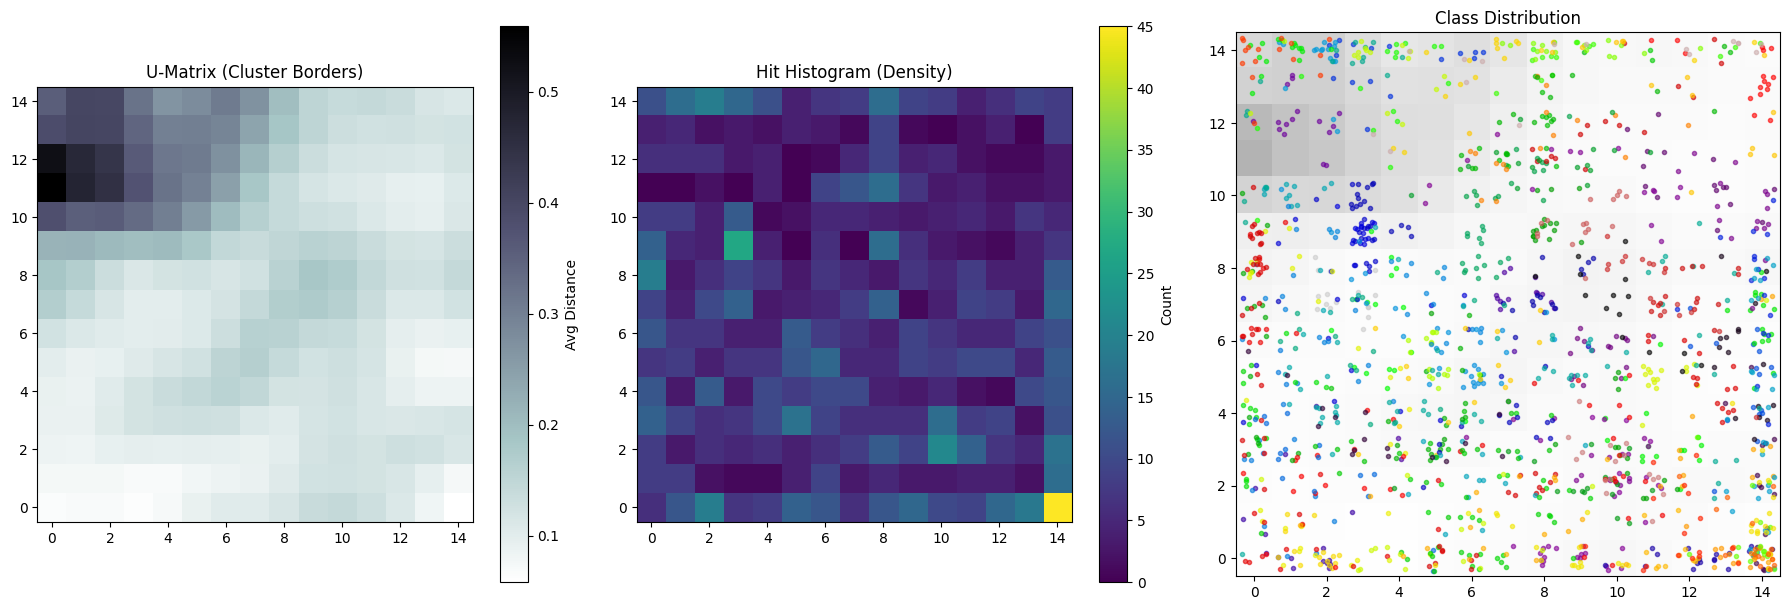

In [12]:
plt.figure(figsize=(18, 6))

u_matrix = som.distance_map()
plt.subplot(1, 3, 1)
plt.title("U-Matrix (Cluster Borders)")
plt.imshow(u_matrix.T, origin='lower', cmap='bone_r') 
plt.colorbar(label='Avg Distance')

hits = som.activation_response(X_scaled)
plt.subplot(1, 3, 2)
plt.title("Hit Histogram (Density)")
plt.imshow(hits.T, origin='lower', cmap='viridis')
plt.colorbar(label='Count')

plt.subplot(1, 3, 3)
plt.title("Class Distribution")
plt.imshow(u_matrix.T, origin='lower', cmap='Greys', alpha=0.3)

colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100)) 
for i, x in enumerate(X_scaled):
    w = som.winner(x)
  
    jitter = np.random.rand(2) * 0.7 - 0.35
    cls = int(y[i]) - 1 
    if cls >= 100: cls = 99
    c = colors[cls]
    plt.plot(w[0] + jitter[0], w[1] + jitter[1], 
             marker='o', markersize=3, color=c, alpha=0.6)

plt.xlim(-0.5, map_size-0.5)
plt.ylim(-0.5, map_size-0.5)

plt.tight_layout()

# Note: Sub-clusters -> Neurons with mixed classes
mixed_count = 0
pure_count = 0
empty_count = 0
class_spread = {} 

neuron_classes = {} # (x,y) 
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    if w not in neuron_classes: neuron_classes[w] = []
    neuron_classes[w].append(y[i])
    
    c = y[i]
    if c not in class_spread: class_spread[c] = set()
    class_spread[c].add(w)

for i in range(map_size):
    for j in range(map_size):
        if (i,j) not in neuron_classes:
            empty_count += 1
        else:
            classes_in_neuron = np.unique(neuron_classes[(i,j)])
            if len(classes_in_neuron) == 1:
                pure_count += 1
            else:
                mixed_count += 1

print(f"Neurons: Empty={empty_count}, Pure={pure_count}, Mixed={mixed_count}")

split_classes = 0
coherent_classes = 0
for c, neurons in class_spread.items():
    if len(neurons) > 1:
        split_classes += 1
    else:
        coherent_classes += 1

print(f"Classes: Coherent (1 neuron)={coherent_classes}, Split (>1 neuron)={split_classes}")

In [13]:
## Each Activity that follows is part of the Modeling Phase

modeling_phase_executor = [
f':modeling_phase rdf:type prov:Activity .',
f':modeling rdfs:label "Modeling Phase" .', 
]
engine.insert(modeling_phase_executor, prefixes=prefixes)

In [14]:
model_data_code_writer = student_a

#############################################
# Documentation 
#############################################

dma_ass_uuid_writer = "b3e840ab-ac23-415e-bd9c-6d00bb79c37a"
dma_comment = """
Training SOM 15x15 with 8000 iterations

Quantization Error: 0.2566
Topographic Error: 0.0150

Neurons: Empty=9, Pure=26, Mixed=190
Classes: Coherent (1 neuron)=0, Split (>1 neuron)=100
"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

som_vizualisation_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_vizualisation_activity rdf:type mls:Algorithm .',
    f':som_vizualisation_activity rdfs:label "SOM Training" .',
    
    
]
engine.insert(som_vizualisation_activity, prefixes=prefixes)

# Task 2 Analyze different initializations of the SOM:

- [ ] Train one further „regular-sized“ SOM using the same training parameters as above, but using a different random seed for initializing the SOM
- [ ] Show and describe 
  - [ ] a) how the cluster structures and class distributions shift on the two SOMs, 
  - [ ] b) the effect on topology violations, cluster relationships, etc. 
  - [ ] c) Which clusters show a stable relationship, which ones change their relative position? 
  - [ ] d) Which data instances are stably mapped with similar data instances, which change a lot? Are they part of the same clusters?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

Training SOM 2 (Seed 999)

Comparative Metrics 
SOM 1 (Seed 42)  | QE: 0.2566 | TE: 0.0150
SOM 2 (Seed 999) | QE: 0.2498 | TE: 0.0144

Cluster Stability Check (Nearest Neighbors) 
Class 1 Neighbors -> SOM 1: [np.int64(96), np.int64(95), np.int64(6)], SOM 2: [np.int64(96), np.int64(95), np.int64(6)] | Overlap: 3/3
Class 50 Neighbors -> SOM 1: [np.int64(51), np.int64(81), np.int64(44)], SOM 2: [np.int64(99), np.int64(94), np.int64(74)] | Overlap: 0/3
Class 100 Neighbors -> SOM 1: [np.int64(27), np.int64(20), np.int64(60)], SOM 2: [np.int64(20), np.int64(27), np.int64(60)] | Overlap: 3/3


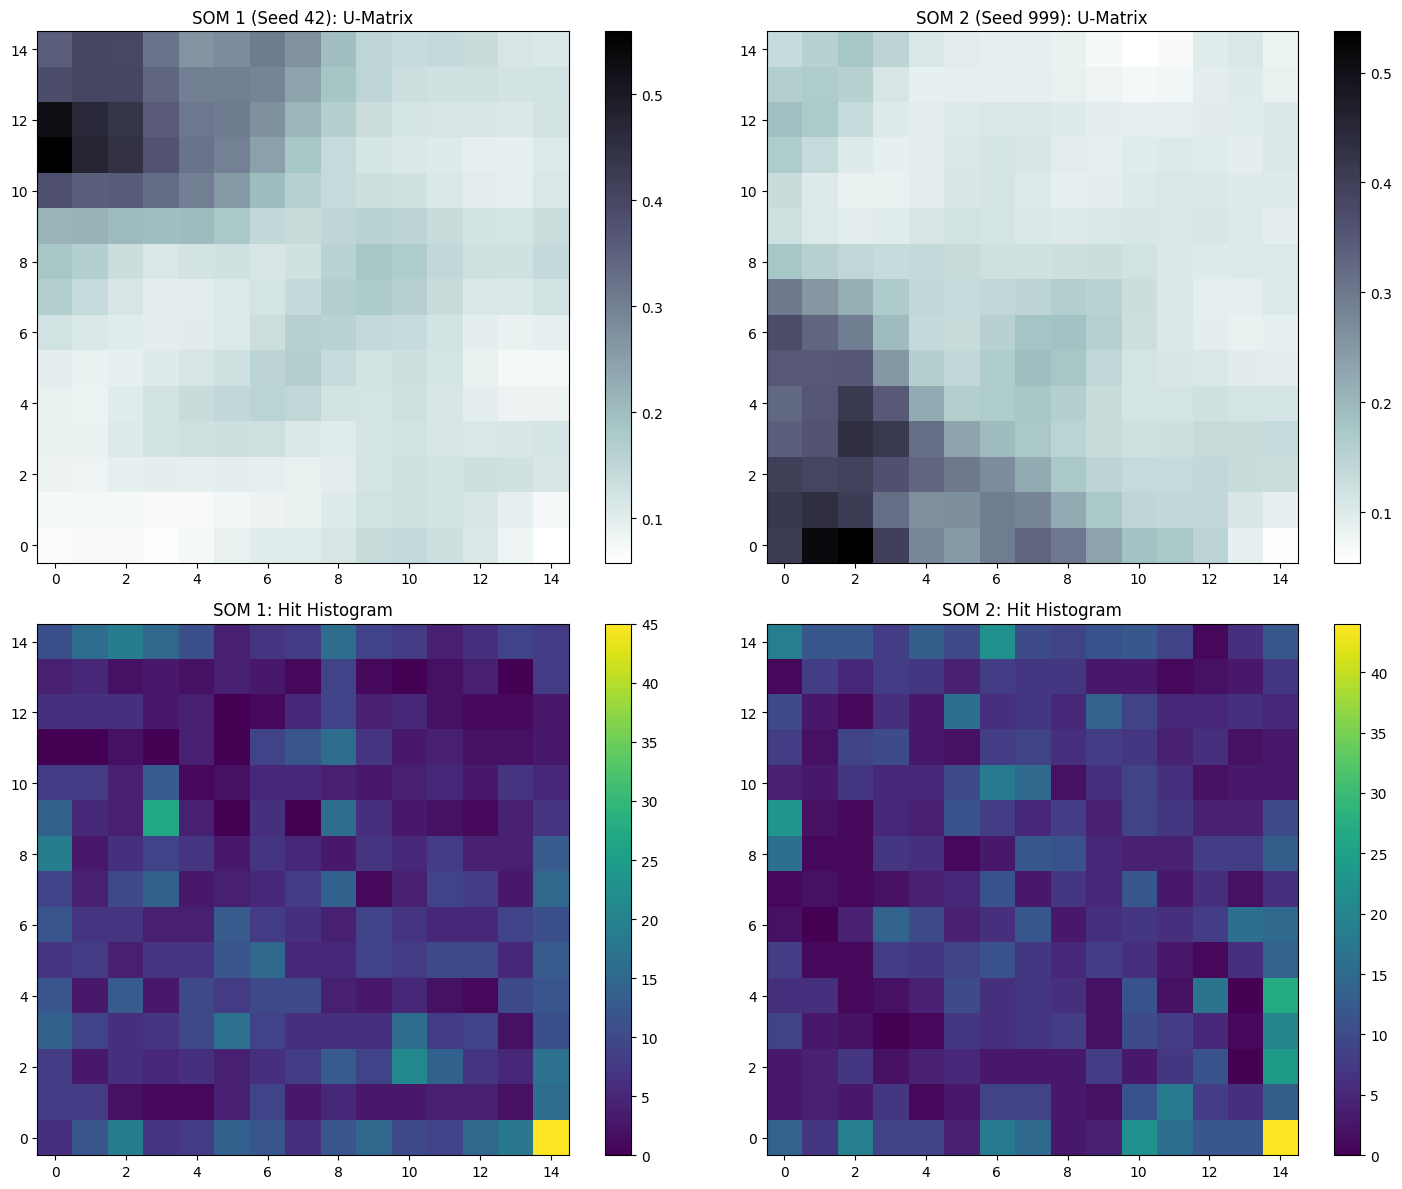

In [15]:
# Task 2

# Train another SOM with a random seed
print("Training SOM 2 (Seed 999)")
som2 = SimpleSOM(map_size, map_size, input_dim, sigma=sigma, learning_rate=lr, random_seed=999)
som2.train(X_scaled, iterations)

qe1 = som.quantization_error(X_scaled)
te1 = som.get_topographic_error(X_scaled)
qe2 = som2.quantization_error(X_scaled)
te2 = som2.get_topographic_error(X_scaled)

print("\nComparative Metrics ")
print(f"SOM 1 (Seed 42)  | QE: {qe1:.4f} | TE: {te1:.4f}")
print(f"SOM 2 (Seed 999) | QE: {qe2:.4f} | TE: {te2:.4f}")

def get_class_centroids(som_instance, data, labels):
    centroids = {}
    class_coords = {} 
    for i, x in enumerate(data):
        w = som_instance.winner(x)
        c = labels[i]
        if c not in class_coords: class_coords[c] = []
        class_coords[c].append(w)
    for c, coords in class_coords.items():
        centroids[c] = np.mean(coords, axis=0)
    return centroids

centroids1 = get_class_centroids(som, X_scaled, y)
centroids2 = get_class_centroids(som2, X_scaled, y)


print("\nCluster Stability Check (Nearest Neighbors) ")
def get_neighbors(centroids, target_cls, k=3):
    if target_cls not in centroids: return []
    target_pos = centroids[target_cls]
    dists = []
    for c, pos in centroids.items():
        if c == target_cls: continue
        d = np.linalg.norm(target_pos - pos)
        dists.append((c, d))
    dists.sort(key=lambda x: x[1])
    return [x[0] for x in dists[:k]]

for cls in [1, 50, 100]:
    n1 = get_neighbors(centroids1, cls)
    n2 = get_neighbors(centroids2, cls)
    overlap = set(n1).intersection(set(n2))
    print(f"Class {cls} Neighbors -> SOM 1: {n1}, SOM 2: {n2} | Overlap: {len(overlap)}/{len(n1)}")


fig, axes = plt.subplots(2, 2, figsize=(15, 12))

u1 = som.distance_map()
u2 = som2.distance_map()

im1 = axes[0,0].imshow(u1.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("SOM 1 (Seed 42): U-Matrix")
plt.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(u2.T, origin='lower', cmap='bone_r')
axes[0,1].set_title("SOM 2 (Seed 999): U-Matrix")
plt.colorbar(im2, ax=axes[0,1])

h1 = som.activation_response(X_scaled)
h2 = som2.activation_response(X_scaled)

im3 = axes[1,0].imshow(h1.T, origin='lower', cmap='viridis')
axes[1,0].set_title("SOM 1: Hit Histogram")
plt.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(h2.T, origin='lower', cmap='viridis')
axes[1,1].set_title("SOM 2: Hit Histogram")
plt.colorbar(im4, ax=axes[1,1])

plt.tight_layout()
save_path = os.path.join(image_output_dir, 'Task2_Hit_Histogram.png')
plt.savefig(save_path)
plt.show()

In [16]:
dma_comment = """
Training SOM 2 (Seed 999)

Comparative Metrics 
SOM 1 (Seed 42)  | QE: 0.2566 | TE: 0.0150
SOM 2 (Seed 999) | QE: 0.2498 | TE: 0.0144

Cluster Stability Check (Nearest Neighbors) 
Class 1 Neighbors -> SOM 1: [np.int64(96), np.int64(95), np.int64(6)], SOM 2: [np.int64(96), np.int64(95), np.int64(6)] | Overlap: 3/3
Class 50 Neighbors -> SOM 1: [np.int64(51), np.int64(81), np.int64(44)], SOM 2: [np.int64(99), np.int64(94), np.int64(74)] | Overlap: 0/3
Class 100 Neighbors -> SOM 1: [np.int64(27), np.int64(20), np.int64(60)], SOM 2: [np.int64(20), np.int64(27), np.int64(60)] | Overlap: 3/3
"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Task 3 Analyze different map sizes:
- [ ] Train 2 additional SOMs varying the size (very small / very large) (provide reasons for choice of sizes)
- [ ] Train each map with rather large neighborhood radius and high learning rate (provide reasons for the definition of „high“!)
- [ ] Analyse in detail the 
  - [ ] a) class distribution, 
  - [ ] b) cluster structure, 
  - [ ] c) quantization errors, 
  - [ ] d) topology violations. 
  - [ ] e) analyze how clusters shift, change in relative size, and how their relative position to each other changes or remains the same. 
  - [ ] f) Check for aspects such as magnification factors. 
- [ ] What is the resulting granularity of clusters visible on the small and large maps? 
- [ ] Are the same clusters visible in the very large map as in the regular map?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

Training Small SOM (5x5) with LR=0.8, Sigma=2.5...
Training Large SOM (50x50) with LR=0.8, Sigma=12.0...

Comparative Metrics
Small Map (5x5)   | QE: 0.3579 (High Error -> compression)
                                   | TE: 0.0075 (Low TE -> simple topology)
------------------------------------------------------------
Large Map (50x50) | QE: 0.2265 (Low Error -> high capacity)
                                   | TE: 0.0138 (High TE Risk )


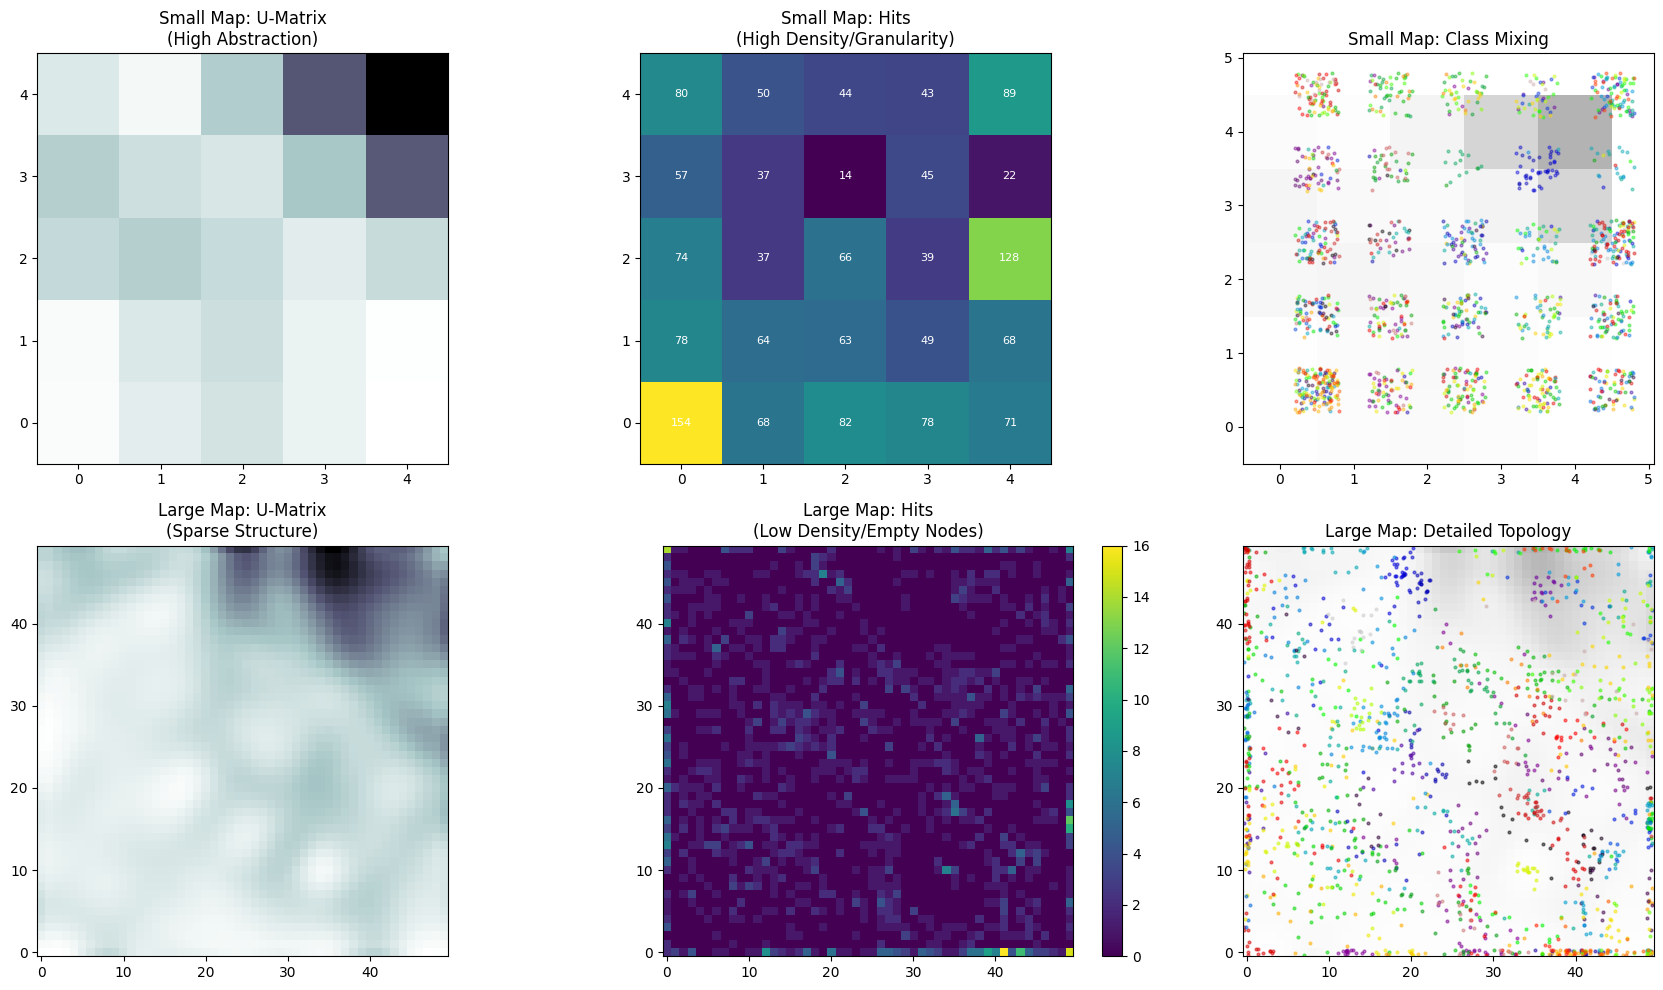


Granularity & Magnification Analysis
Small Map Empty Neurons: 0/25 (0.0%)
Large Map Empty Neurons: 1557/2500 (62.3%)

Findings:
- Small Map: Super-clusters are created. High quantization error leads to loss of detail.
- Large Map: The dead (empty) neurons represent the empty space in the manifold.
- Large map: The light areas in U-Matrix (i.e. ridges are much wider -> means that are the separation between clusters.


In [17]:
# Task 3

small_dim = 5
small_sigma = 2.5  
large_dim = 50
large_sigma = 12.0 
high_lr = 0.8
iterations = 8000

# Training
print(f"Training Small SOM ({small_dim}x{small_dim}) with LR={high_lr}, Sigma={small_sigma}...")
som_small = SimpleSOM(small_dim, small_dim, input_dim, sigma=small_sigma, learning_rate=high_lr, random_seed=42)
som_small.train(X_scaled, iterations)

print(f"Training Large SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={large_sigma}...")
som_large = SimpleSOM(large_dim, large_dim, input_dim, sigma=large_sigma, learning_rate=high_lr, random_seed=42)
som_large.train(X_scaled, iterations)

qe_small = som_small.quantization_error(X_scaled)
te_small = som_small.get_topographic_error(X_scaled)

qe_large = som_large.quantization_error(X_scaled)
te_large = som_large.get_topographic_error(X_scaled)

print("\nComparative Metrics")
print(f"Small Map ({small_dim}x{small_dim})   | QE: {qe_small:.4f} (High Error -> compression)")
print(f"                                   | TE: {te_small:.4f} (Low TE -> simple topology)")
print("-" * 60)
print(f"Large Map ({large_dim}x{large_dim}) | QE: {qe_large:.4f} (Low Error -> high capacity)")
print(f"                                   | TE: {te_large:.4f} (High TE Risk )")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

u_small = som_small.distance_map()
axes[0,0].imshow(u_small.T, origin='lower', cmap='bone_r')
axes[0,0].set_title(f"Small Map: U-Matrix\n(High Abstraction)")

h_small = som_small.activation_response(X_scaled)
axes[0,1].imshow(h_small.T, origin='lower', cmap='viridis')
for i in range(small_dim):
    for j in range(small_dim):
        axes[0,1].text(i, j, int(h_small[i,j]), ha='center', va='center', color='white', fontsize=8)
axes[0,1].set_title(f"Small Map: Hits\n(High Density/Granularity)")

axes[0,2].imshow(u_small.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_small.winner(x)

    jitter = np.random.rand(2) * 0.6 - 0.3
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[0,2].plot(w[0] + 0.5 + jitter[0], w[1] + 0.5 + jitter[1], 
             marker='o', markersize=2, color=c, alpha=0.4)
axes[0,2].set_title("Small Map: Class Mixing")

u_large = som_large.distance_map()
axes[1,0].imshow(u_large.T, origin='lower', cmap='bone_r')
axes[1,0].set_title(f"Large Map: U-Matrix\n(Sparse Structure)")

h_large = som_large.activation_response(X_scaled)
im_large = axes[1,1].imshow(h_large.T, origin='lower', cmap='viridis')
axes[1,1].set_title(f"Large Map: Hits\n(Low Density/Empty Nodes)")
plt.colorbar(im_large, ax=axes[1,1], fraction=0.046)

axes[1,2].imshow(u_large.T, origin='lower', cmap='Greys', alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_large.winner(x)
    jitter = np.random.rand(2) * 0.7 - 0.35
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[1,2].plot(w[0] + jitter[0], w[1] + jitter[1], 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[1,2].set_title("Large Map: Detailed Topology")

plt.tight_layout()
save_path = os.path.join(image_output_dir, 'Task3_LargeMap_Detailed_Topology.png')
plt.savefig(save_path)
plt.show()

empty_nodes_small = np.sum(h_small == 0)
empty_nodes_large = np.sum(h_large == 0)

print("\nGranularity & Magnification Analysis")
print(f"Small Map Empty Neurons: {empty_nodes_small}/{small_dim*small_dim} ({(empty_nodes_small/25)*100:.1f}%)")
print(f"Large Map Empty Neurons: {empty_nodes_large}/{large_dim*large_dim} ({(empty_nodes_large/2500)*100:.1f}%)")
print("\nFindings:")
print("- Small Map: Super-clusters are created. High quantization error leads to loss of detail.")
print("- Large Map: The dead (empty) neurons represent the empty space in the manifold.")
print("- Large map: The light areas in U-Matrix (i.e. ridges are much wider -> means that are the separation between clusters.")


In [18]:
dma_comment = """
Training Small SOM (5x5) with LR=0.8, Sigma=2.5...
Training Large SOM (50x50) with LR=0.8, Sigma=12.0...

Comparative Metrics
Small Map (5x5)   | QE: 0.3579 (High Error -> compression)
                  | TE: 0.0075 (Low TE -> simple topology)
------------------------------------------------------------
Large Map (50x50) | QE: 0.2265 (Low Error -> high capacity)
                  | TE: 0.0138 (High TE Risk )
                                   

Granularity & Magnification Analysis
Small Map Empty Neurons: 0/25 (0.0%)
Large Map Empty Neurons: 1557/2500 (62.3%)

Findings:
- Small Map: Super-clusters are created. High quantization error leads to loss of detail.
- Large Map: The dead (empty) neurons represent the empty space in the manifold.
- Large map: The light areas in U-Matrix (i.e. ridges are much wider -> means that are the separation between clusters.
"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Task 4 Analyze different initial neighborhood radius settings:
- [ ] Train the very large SOM as specified above, but with a much too small neighborhood radius.
- [ ] Analyse the 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations. 
  - [ ] d) In how far does this map differ from the very large map trained with a correct/high initial neighborhood radius?
- [ ] Describe and compare the structures found (what is the effect of a „too small“ neighborhood radius? How to detect it?)



Training 'Bad Sigma' SOM (50x50) with LR=0.8, Sigma=0.5...

=Comparative Metrics: Neighborhood Radius Effect 
Map Type             | Quantization Error (QE)   | Topographic Error (TE)   
---------------------------------------------------------------------------
Good Radius (12.0)   | 0.2265                    | 0.0138                   
Small Radius (0.5)   | 0.2582                    | 0.6956                   


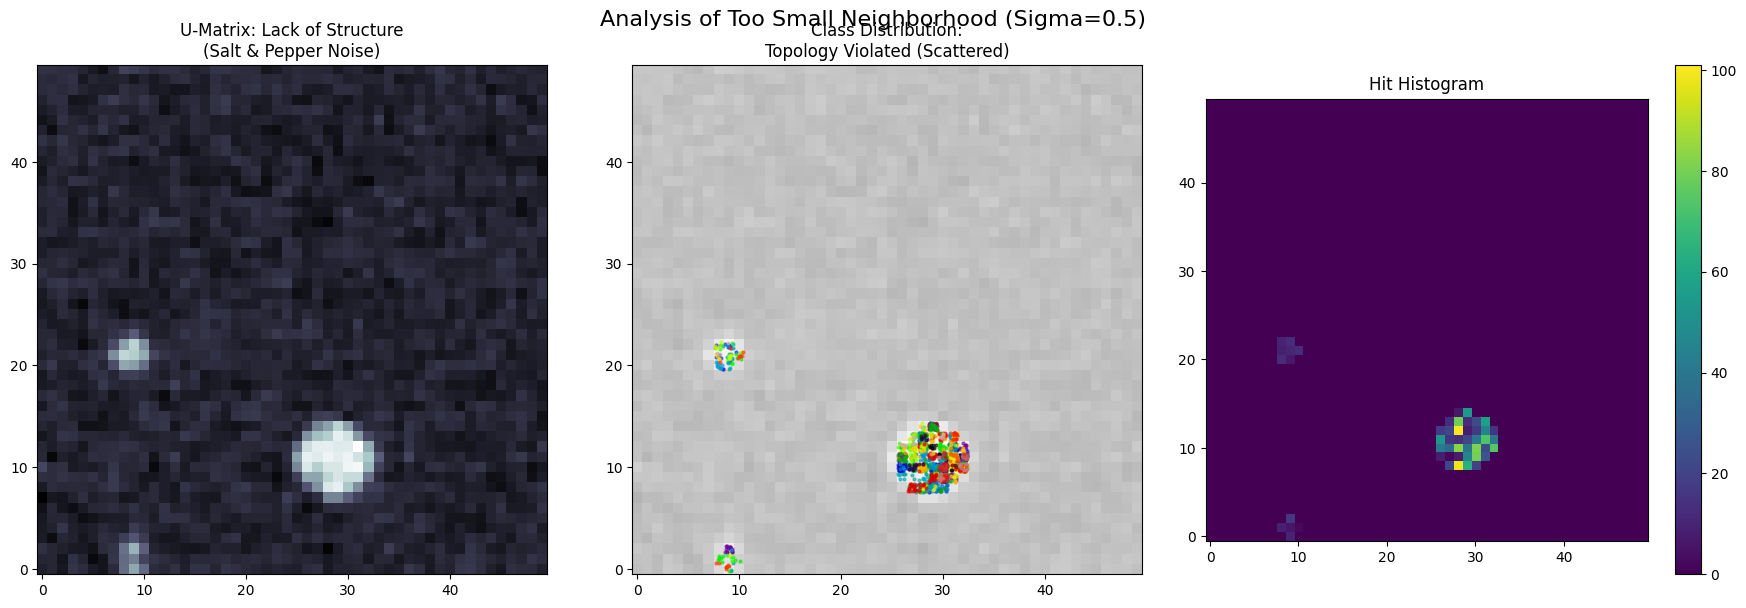


Findings 
a) Cluster Structure:
   - The U-Matrix looks like static noise. There are no smooth valleys or ridges.
   - Possible reason why: Adjacent neurons did not learn together. Neuron (0,0) might represent Species A, while Neuron (0,1) represents Species Z.

b) Quantization Error (QE):
   - QE is 0.2582.
   - Possible reason why: Individual neurons became very good prototypes for specific data points because they stick with their neighbors.

c) Topology Violations
   - TE is 0.6956.
   - Seems to be a disordered' map

d) Comparison to Correct Map:
   - Good Map: Classes are grouped. TE should be low.
   - Bad Map: Classes are scattered. TE is high.


In [19]:
# Task 4

bad_sigma = 0.5 
large_dim = 50 
high_lr = 0.8
iterations = 8000

print(f"Training 'Bad Sigma' SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={bad_sigma}...")
som_bad = SimpleSOM(large_dim, large_dim, input_dim, sigma=bad_sigma, learning_rate=high_lr, random_seed=42)
som_bad.train(X_scaled, iterations)

qe_bad = som_bad.quantization_error(X_scaled)
te_bad = som_bad.get_topographic_error(X_scaled)

try:
    qe_good = som_large.quantization_error(X_scaled)
    te_good = som_large.get_topographic_error(X_scaled)
except NameError:
    qe_good, te_good = 0.0, 0.0 

print("\n=Comparative Metrics: Neighborhood Radius Effect ")
print(f"{'Map Type':<20} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 75)
print(f"{'Good Radius (12.0)':<20} | {qe_good:<25.4f} | {te_good:<25.4f}")
print(f"{'Small Radius (0.5)':<20} | {qe_bad:<25.4f} | {te_bad:<25.4f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Analysis of Too Small Neighborhood (Sigma={bad_sigma})", fontsize=16)


u_bad = som_bad.distance_map()
axes[0].imshow(u_bad.T, origin='lower', cmap='bone_r')
axes[0].set_title("U-Matrix: Lack of Structure\n(Salt & Pepper Noise)")

axes[1].imshow(u_bad.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_bad.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]

    axes[1].plot(w[0] + np.random.rand()*0.8 - 0.4, w[1] + np.random.rand()*0.8 - 0.4, 
             marker='o', markersize=2, color=c, alpha=0.6)
axes[1].set_title("Class Distribution:\nTopology Violated (Scattered)")

h_bad = som_bad.activation_response(X_scaled)
im3 = axes[2].imshow(h_bad.T, origin='lower', cmap='viridis')
axes[2].set_title("Hit Histogram")
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
save_path = os.path.join(image_output_dir, 'Task4_Hit_Histogram.png')
plt.savefig(save_path)
plt.show()


print("\nFindings ")
print("a) Cluster Structure:")
print("   - The U-Matrix looks like static noise. There are no smooth valleys or ridges.")
print("   - Possible reason why: Adjacent neurons did not learn together. Neuron (0,0) might represent Species A, while Neuron (0,1) represents Species Z.")

print("\nb) Quantization Error (QE):")
print(f"   - QE is {qe_bad:.4f}.")
print("   - Possible reason why: Individual neurons became very good prototypes for specific data points because they stick with their neighbors.")

print("\nc) Topology Violations")
print(f"   - TE is {te_bad:.4f}.")
print("   - Seems to be a disordered' map")

print("\nd) Comparison to Correct Map:")
print("   - Good Map: Classes are grouped. TE should be low.")
print("   - Bad Map: Classes are scattered. TE is high.")


In [20]:
dma_comment = """
Training 'Bad Sigma' SOM (50x50) with LR=0.8, Sigma=0.5...

=Comparative Metrics: Neighborhood Radius Effect 
Map Type             | Quantization Error (QE)   | Topographic Error (TE)   
---------------------------------------------------------------------------
Good Radius (12.0)   | 0.2265                    | 0.0138                   
Small Radius (0.5)   | 0.2582                    | 0.6956                   

Findings 
a) Cluster Structure:
   - The U-Matrix looks like static noise. There are no smooth valleys or ridges.
   - Possible reason why: Adjacent neurons did not learn together. Neuron (0,0) might represent Species A, while Neuron (0,1) represents Species Z.

b) Quantization Error (QE):
   - QE is 0.2582.
   - Possible reason why: Individual neurons became very good prototypes for specific data points because they stick with their neighbors.

c) Topology Violations
   - TE is 0.6956.
   - Seems to be a disordered' map

d) Comparison to Correct Map:
   - Good Map: Classes are grouped. TE should be low.
   - Bad Map: Classes are scattered. TE is high.
"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Task 5 Analyze different initial learning rates:
- [ ] Train the regular-sized SOM as specified above, but with a (I) much too large / (II) much too small learning rate (provide justification for the setting of the parameter)
- [ ] Analyse for both (I) and (II) 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations.
  - [ ] d) In how far do these two maps differ from the well-trained map analyzed above?
- [ ] Describe and compare the structures found (how can you detect „too small“ learning rates? When do they start to make sense?

1. Training SOM with too-large Rate (LR=2.5)
2. Training SOM with too-small Rate (LR=0.01)

 Metrics: Learning Rate 
Configuration             | Quantization Error (QE)   | Topographic Error (TE)   
--------------------------------------------------------------------------------
Baseline (LR=0.5)         | 0.2566                    | 0.0150                   
Too Large (LR=2.5)        | 0.2669                    | 0.1062                    (Oscillation)
Too Small (LR=0.01)       | 0.3009                    | 0.0288                    (Underfitting)


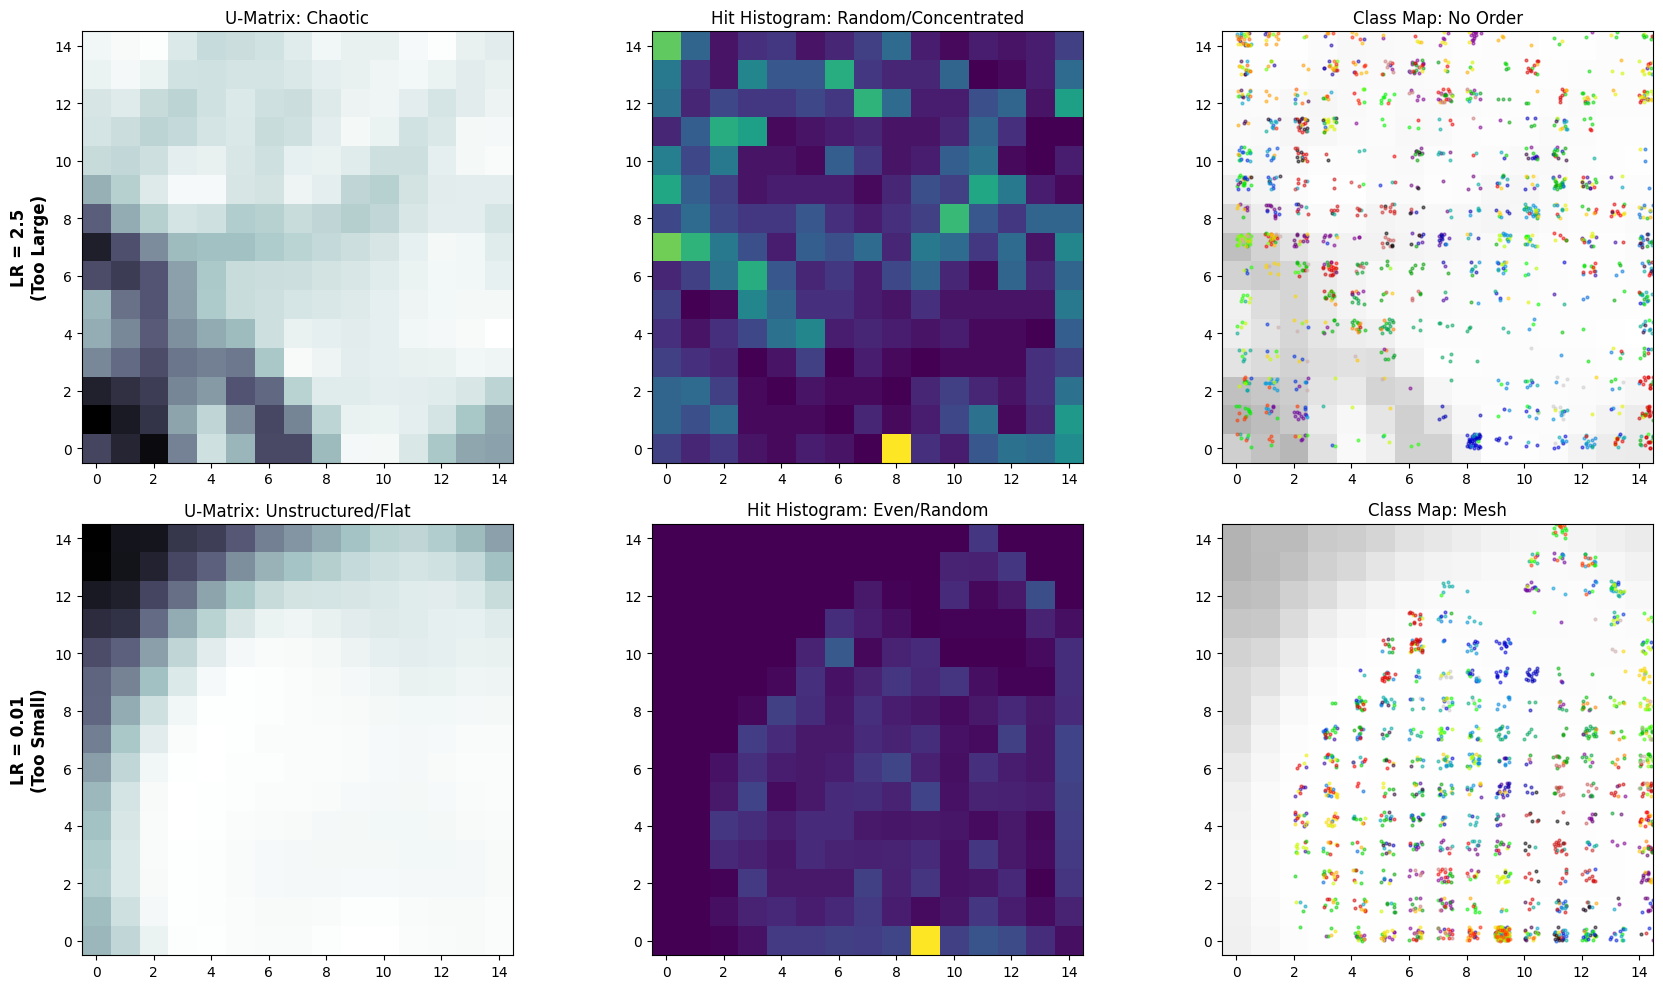


 Findings 
(I) Too Large Learning Rate (2.5):
   a) Cluster Structure: The map looks  random noise.
   b) QE: Very High. The prototypes keep jumping over the data points.
   c) TE: Very High. It seems that the pdates are breaking the neighborhood links.
   d) LR is likely too high.

(II) Too Small Learning Rate (0.01):
   a) Cluster Structure: Looks like random initialization.
   b) QE: High. The neurons havn't moved far enough to make for a proper distribution.
   c) TE: High. The map is still not good enough


In [21]:
# Task 5


# Same as from Task1
map_dim = 15
sigma = 4.0
iterations = 8000
lr_too_large = 2.5
lr_too_small = 0.01

#Training
print(f"1. Training SOM with too-large Rate (LR={lr_too_large})")
som_large_lr = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=lr_too_large, random_seed=42)
som_large_lr.train(X_scaled, iterations)

print(f"2. Training SOM with too-small Rate (LR={lr_too_small})")
som_small_lr = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=lr_too_small, random_seed=42)
som_small_lr.train(X_scaled, iterations)

def safe_metrics(som, data):
    try:
        qe = som.quantization_error(data)
        te = som.get_topographic_error(data)
        return qe, te
    except Exception as e:
        return float('inf'), float('inf')

qe_large_lr, te_large_lr = safe_metrics(som_large_lr, X_scaled)
qe_small_lr, te_small_lr = safe_metrics(som_small_lr, X_scaled)

# Baseline from Task 1
try:
    qe_base = som.quantization_error(X_scaled)
    te_base = som.get_topographic_error(X_scaled)
except NameError:
    qe_base, te_base =0.2566, 0.0150 

print("\n Metrics: Learning Rate ")
print(f"{'Configuration':<25} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 80)
print(f"{'Baseline (LR=0.5)':<25} | {qe_base:<25.4f} | {te_base:<25.4f}")
print(f"{'Too Large (LR=2.5)':<25} | {qe_large_lr:<25.4f} | {te_large_lr:<25.4f} (Oscillation)")
print(f"{'Too Small (LR=0.01)':<25} | {qe_small_lr:<25.4f} | {te_small_lr:<25.4f} (Underfitting)")


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[0,0].set_ylabel(f"LR = {lr_too_large}\n(Too Large)", fontsize=12, fontweight='bold')

u_large = som_large_lr.distance_map()
axes[0,0].imshow(u_large.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("U-Matrix: Chaotic")

h_large = som_large_lr.activation_response(X_scaled)
axes[0,1].imshow(h_large.T, origin='lower', cmap='viridis')
axes[0,1].set_title("Hit Histogram: Random/Concentrated")

axes[0,2].imshow(u_large.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_large_lr.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[0,2].plot(w[0] + np.random.rand()*0.5, w[1] + np.random.rand()*0.5, 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[0,2].set_title("Class Map: No Order")

axes[1,0].set_ylabel(f"LR = {lr_too_small}\n(Too Small)", fontsize=12, fontweight='bold')

u_small = som_small_lr.distance_map()
axes[1,0].imshow(u_small.T, origin='lower', cmap='bone_r')
axes[1,0].set_title("U-Matrix: Unstructured/Flat")

h_small = som_small_lr.activation_response(X_scaled)
axes[1,1].imshow(h_small.T, origin='lower', cmap='viridis')
axes[1,1].set_title("Hit Histogram: Even/Random")

axes[1,2].imshow(u_small.T, origin='lower', cmap='Greys', alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_small_lr.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    axes[1,2].plot(w[0] + np.random.rand()*0.5, w[1] + np.random.rand()*0.5, 
             marker='o', markersize=2, color=c, alpha=0.5)
axes[1,2].set_title("Class Map: Mesh")

plt.tight_layout()
save_path = os.path.join(image_output_dir, 'Task5_ClassMap_Hit_Histogram.png')
plt.savefig(save_path)
plt.show()

print("\n Findings ")
print("(I) Too Large Learning Rate (2.5):")
print("   a) Cluster Structure: The map looks  random noise.")
print("   b) QE: Very High. The prototypes keep jumping over the data points.")
print("   c) TE: Very High. It seems that the pdates are breaking the neighborhood links.")
print("   d) LR is likely too high.")

print("\n(II) Too Small Learning Rate (0.01):")
print("   a) Cluster Structure: Looks like random initialization.")
print("   b) QE: High. The neurons havn't moved far enough to make for a proper distribution.")
print("   c) TE: High. The map is still not good enough")



In [22]:
dma_comment = """

"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Task 6 Analyze different max iterations:
- [ ] Train a regular SOM using 2, 5, 10, 50, 100, 1000, 5000, 10000 iterations
- [ ] Analyse cluster structure. 
  - [ ] a) When do cluster structures start to emerge? 
  - [ ] b) After how many iterations do they stabilize? 
  - [ ] c) How can you tell from the quality measures whether the map is stable? 
  - [ ] d) Which visualizations help you discover not-yet stable SOM mappings?
- [ ] Describe and compare the structures found (what is the effect of a „too low“ number of iterations, when does it start to converge properly/lead to reasonable structures?)

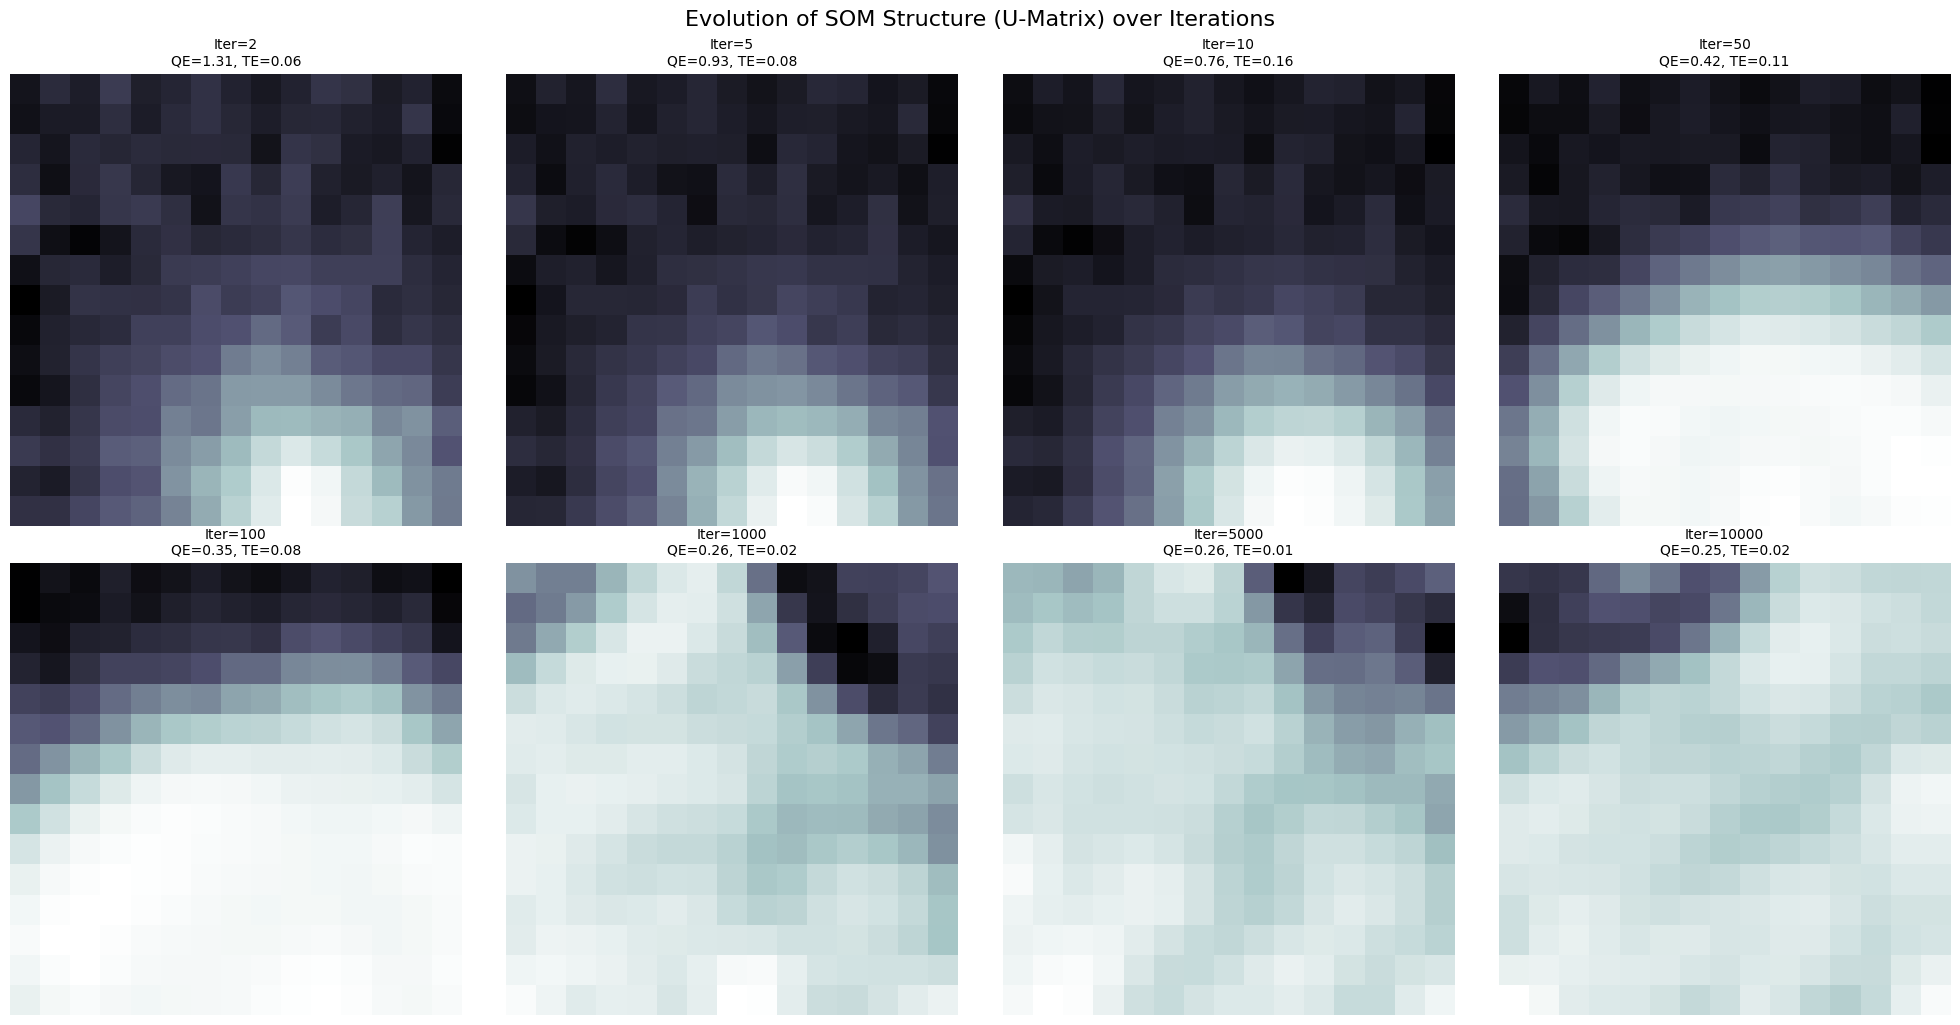

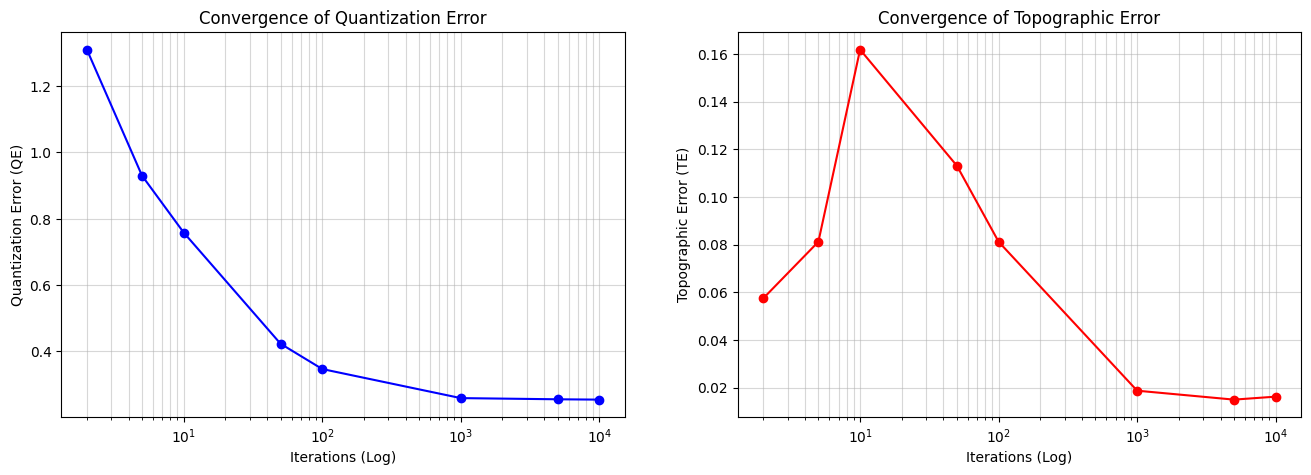


Findings
a) Structure Emergence
   - Iterations 2-10: The map is random. QE is high, TE is high.
   - Iterations 50-100: Global Ordering.
   - Structure  emerges when number of iterations > Number of Neurons.

b) Stabilization:
   - Iterations 1000: Major clusters become visible. The map is  ordered, and TE goes down.
   - Iterations 5000-10000: Boundaries become sharper.
   - Stability is reached when the learning rate and sigma have decayed.

c) Quality Measures & Stability:
   - QE (Quantization Error): Decreases rapidly and later asymptotes.
   - TE (Topographic Error): Drops towards zero.
   - Seems to overfit.


In [23]:
# Task 6

iteration_steps = [2, 5, 10, 50, 100, 1000, 5000, 10000]
map_dim = 15
sigma = 4.0
learning_rate = 0.5
history_qe = []
history_te = []
u_matrices = []
titles = []

for iters in iteration_steps:
    som_iter = SimpleSOM(map_dim, map_dim, input_dim, sigma=sigma, learning_rate=learning_rate, random_seed=42)
    som_iter.train(X_scaled, iters)
    
    qe = som_iter.quantization_error(X_scaled)
    te = som_iter.get_topographic_error(X_scaled)
    
    history_qe.append(qe)
    history_te.append(te)
    u_matrices.append(som_iter.distance_map())
    titles.append(f"Iter={iters}\nQE={qe:.2f}, TE={te:.2f}")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    im = ax.imshow(u_matrices[i].T, origin='lower', cmap='bone_r')
    ax.set_title(titles[i], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.suptitle("Evolution of SOM Structure (U-Matrix) over Iterations", fontsize=16, y=1.02)
save_path = os.path.join(image_output_dir, 'Task6_SOM_Structure.png')
plt.savefig(save_path)
plt.show()

fig2, ax2 = plt.subplots(1, 2, figsize=(16, 5))

ax2[0].plot(iteration_steps, history_qe, marker='o', color='blue', linestyle='-')
ax2[0].set_xscale('log')
ax2[0].set_xlabel('Iterations (Log)')
ax2[0].set_ylabel('Quantization Error (QE)')
ax2[0].set_title('Convergence of Quantization Error')
ax2[0].grid(True, which="both", ls="-", alpha=0.5)

ax2[1].plot(iteration_steps, history_te, marker='o', color='red', linestyle='-')
ax2[1].set_xscale('log')
ax2[1].set_xlabel('Iterations (Log)')
ax2[1].set_ylabel('Topographic Error (TE)')
ax2[1].set_title('Convergence of Topographic Error')
ax2[1].grid(True, which="both", ls="-", alpha=0.5)

save_path = os.path.join(image_output_dir, 'Task6_Topographic_Error.png')
plt.savefig(save_path)
plt.show()

print("\nFindings")
print("a) Structure Emergence")
print("   - Iterations 2-10: The map is random. QE is high, TE is high.")
print("   - Iterations 50-100: Global Ordering.")
print("   - Structure  emerges when number of iterations > Number of Neurons.")

print("\nb) Stabilization:")
print("   - Iterations 1000: Major clusters become visible. The map is  ordered, and TE goes down.")
print("   - Iterations 5000-10000: Boundaries become sharper.")
print("   - Stability is reached when the learning rate and sigma have decayed.")

print("\nc) Quality Measures & Stability:")
print("   - QE (Quantization Error): Decreases rapidly and later asymptotes.")
print("   - TE (Topographic Error): Drops towards zero.")
print("   - Seems to overfit.")




In [24]:
dma_comment = """

"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Task 7 Detailed analysis of an „Optimal SOM“
- [ ] Train a SOM using what you consider to be „optimal parameters“ based on sub-tasks 1
- [ ] Describe the final model following MLSO.
- [ ] Provide a detailed interpretation of the cluster/class structures using a combination of visualizations and their parameter settings. Describe the findings in detail, specifically analyzing and providing rationale for
  - [ ] a. Cluster densities / cardinalities, shapes: what can you tell about the cluster sizes shapes, their cardinalities and densities? Can you observe areas of higher/lower densities? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] b. Hierarchical cluster relationships: can you detect any hierarchies in the data? How do they seem to be structured? Which clusters are similar, which are very distant, how could they be related? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] c. Topological relations / violations: in which areas can you observe topology violations? What types of violations do you observe in which areas of the map (i.e. actual violations due to bad training or the inherent structure of the data vs. cluster data that is mapped onto the plane). In how far do different visualizations agree on these violations? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] d. Class distribution: Which classes are mapped onto which parts of the map? How do they relate to each other? In how far does the class distribution match the cluster structure? Which classes are well-separated, which ones less so? What might be the reason for these overlaps? Is the mapping less correct in these regions (e.g. higher error measures)? Are these areas well-separated. Which classes form homogeneous clusters, which form sub-clusters, how similar are these sub-clusters?
  - [ ] e. Quality of the map in terms of vector quantization and topology violation: is the quality homogeneous, are there certain areas or classes where the quality of the mapping is lower, others where it is higher?

Training OPTIMAL SOM (20x20)

Final Model Metrics
Quantization Error (QE): 0.2433 (Avg distance from sample to prototype)
Topographic Error  (TE): 0.0131 (Fraction of topology violations)


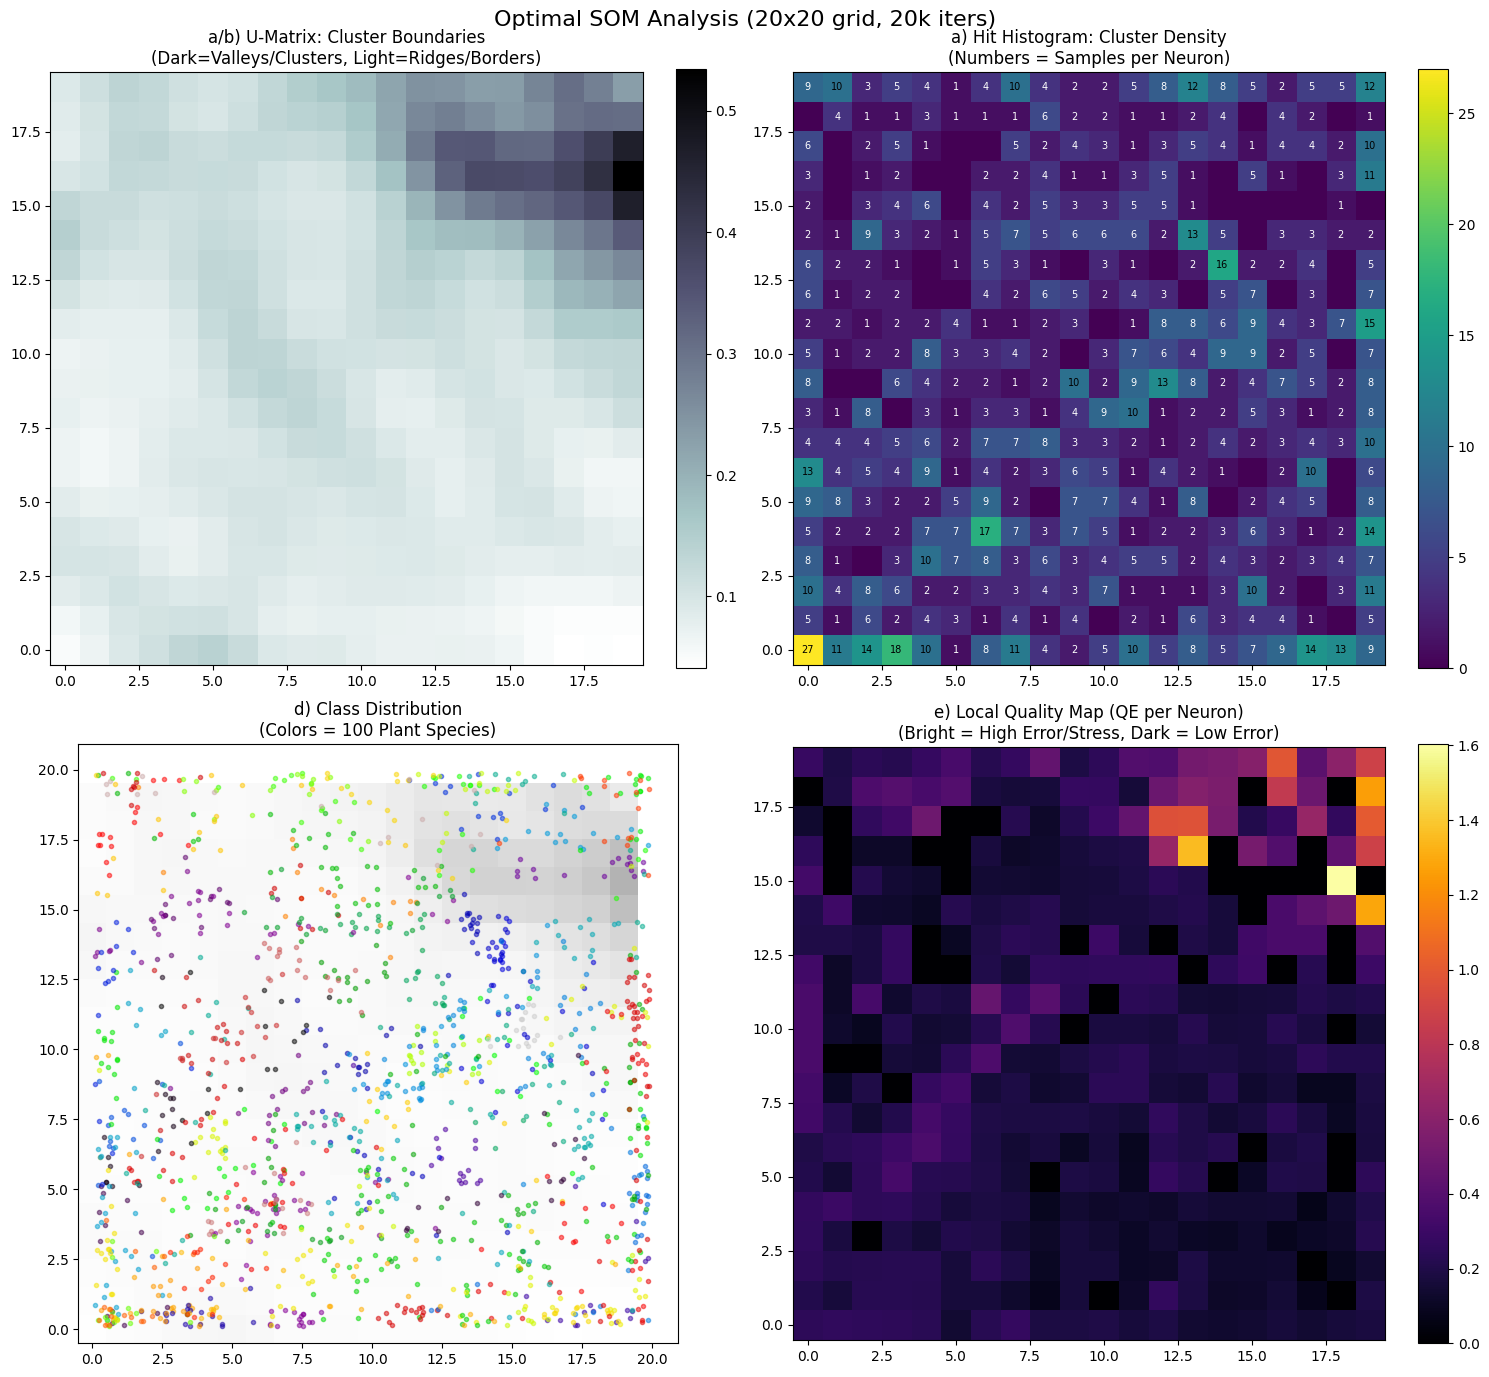

Findings

a. Cluster Densities & Cardinalities (Hit Histogram):
   - Findings: The Hit Histogram shows a non-uniform distribution. There are hotspots (green), and cold spots (purple) .
   - Shapes: The clusters are not circular
   - The U-Matrix might show a smooth valley, the Hit Histogram shows, that the  data points often are rather at the edges.

b. Hierarchical Relationships (U-Matrix):
   - Findings: There are Super-Clusters. There are large dark regions (valleys) and high light walls (i.e., ridges).
   - Structure: The large valleys, have smaller ridges. This indicates a Hierarchy.
   - Similarity: Adjacent clusters in the U-Matrix are similar.

c. Topological Relations & Violations:
   - Global TE is low, so the map is largely unfolded.
   - Violations:Yes, there are some

d. Class Distribution:
   - Separation: Some classes look like isolated tight knots (=Homogeneous Clusters).
   - Overlap: In the center, we see a mix of colors.
   - Sub-clusters: Some classes are split obvi

In [25]:
# Task 7

opt_dim = 20
opt_sigma = 5.0
opt_lr = 0.5
opt_iters = 20000

print(f"Training OPTIMAL SOM ({opt_dim}x{opt_dim})")
som_opt = SimpleSOM(opt_dim, opt_dim, input_dim, sigma=opt_sigma, learning_rate=opt_lr, random_seed=42)
som_opt.train(X_scaled, opt_iters)

qe_opt = som_opt.quantization_error(X_scaled)
te_opt = som_opt.get_topographic_error(X_scaled)

print("\nFinal Model Metrics")
print(f"Quantization Error (QE): {qe_opt:.4f} (Avg distance from sample to prototype)")
print(f"Topographic Error  (TE): {te_opt:.4f} (Fraction of topology violations)")

qe_map = np.zeros((opt_dim, opt_dim))
hits_map = som_opt.activation_response(X_scaled)
unit_errors = {} 

for x in X_scaled:
    w = som_opt.winner(x)
    dist = som_opt._activate(x).min()
    if w not in unit_errors: unit_errors[w] = []
    unit_errors[w].append(dist)

for i in range(opt_dim):
    for j in range(opt_dim):
        if (i,j) in unit_errors:
            qe_map[i,j] = np.mean(unit_errors[(i,j)])
        else:
            qe_map[i,j] = 0.0 

fig, axes = plt.subplots(2, 2, figsize=(15, 14))
fig.suptitle(f"Optimal SOM Analysis (20x20 grid, 20k iters)", fontsize=16)

u_opt = som_opt.distance_map()
im1 = axes[0,0].imshow(u_opt.T, origin='lower', cmap='bone_r')
axes[0,0].set_title("a/b) U-Matrix: Cluster Boundaries\n(Dark=Valleys/Clusters, Light=Ridges/Borders)")
plt.colorbar(im1, ax=axes[0,0], fraction=0.046)

im2 = axes[0,1].imshow(hits_map.T, origin='lower', cmap='viridis')
for i in range(opt_dim):
    for j in range(opt_dim):
        c = int(hits_map[i,j])
        if c > 0:
            axes[0,1].text(i, j, str(c), ha='center', va='center', color='white' if c<10 else 'black', fontsize=7)
axes[0,1].set_title("a) Hit Histogram: Cluster Density\n(Numbers = Samples per Neuron)")
plt.colorbar(im2, ax=axes[0,1], fraction=0.046)

axes[1,0].imshow(u_opt.T, origin='lower', cmap='Greys', alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_opt.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    j1 = np.random.rand()*0.8 - 0.4
    j2 = np.random.rand()*0.8 - 0.4
    axes[1,0].plot(w[0] + 0.5 + j1, w[1] + 0.5 + j2, marker='o', markersize=3, color=c, alpha=0.5)
axes[1,0].set_title("d) Class Distribution\n(Colors = 100 Plant Species)")

im4 = axes[1,1].imshow(qe_map.T, origin='lower', cmap='inferno')
axes[1,1].set_title("e) Local Quality Map (QE per Neuron)\n(Bright = High Error/Stress, Dark = Low Error)")
plt.colorbar(im4, ax=axes[1,1], fraction=0.046)

plt.tight_layout()
save_path = os.path.join(image_output_dir, 'Task7_ Cluster_Density.png')
plt.savefig(save_path)
plt.show()

print("Findings")

print("\na. Cluster Densities & Cardinalities (Hit Histogram):")
print("   - Findings: The Hit Histogram shows a non-uniform distribution. There are hotspots (green), and cold spots (purple) .")
print("   - Shapes: The clusters are not circular")
print("   - The U-Matrix might show a smooth valley, the Hit Histogram shows, that the  data points often are rather at the edges.")

print("\nb. Hierarchical Relationships (U-Matrix):")
print("   - Findings: There are Super-Clusters. There are large dark regions (valleys) and high light walls (i.e., ridges).")
print("   - Structure: The large valleys, have smaller ridges. This indicates a Hierarchy.")
print("   - Similarity: Adjacent clusters in the U-Matrix are similar.")

print("\nc. Topological Relations & Violations:")
print("   - Global TE is low, so the map is largely unfolded.")
print("   - Violations:Yes, there are some")


print("\nd. Class Distribution:")
print("   - Separation: Some classes look like isolated tight knots (=Homogeneous Clusters).")
print("   - Overlap: In the center, we see a mix of colors.")
print("   - Sub-clusters: Some classes are split obvioulsy into two distinct groups. Could be multi-modal data.")

print("\ne. Map Quality (QE Map):")
print("   - Homogeneity: not much homogeneous.")



In [26]:
dma_comment = """


"""

train_som_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':som_training rdf:type mls:Algorithm .',
    f':som_training rdfs:label "SOM Training" .',
    
    
]
engine.insert(train_som_activity, prefixes=prefixes)

# Latex Report

In [27]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [28]:
# This cell includes cleaning functions

from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

In [29]:
# This cell includes exemplary queries for different phases

base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"
print(f"Fetching data ONLY for: {base_iri}")

prefix_header = f"""
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX sc: <https://schema.org/>
PREFIX cr: <http://mlcommons.org/croissant/>
PREFIX mls: <http://www.w3.org/ns/mls#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX : <{base_iri}>
"""

### Author Block
author_query = f"""
{prefix_header}
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}
  
  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""
res_authors = engine.query(author_query)
author_block_latex = ""

if not res_authors.empty: # type:ignore
    for _, row in res_authors.iterrows(): # type:ignore

        uri_str = str(row['uri'])
        given = latex_escape(clean_rdf(row['given']))
        family = latex_escape(clean_rdf(row['family']))
        matr = latex_escape(clean_rdf(row['matr']))
        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"
        
        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

### Business Understanding example
bu_query = f"""
{prefix_header}
SELECT ?ds_comment ?bo_comment WHERE {{
  OPTIONAL {{ :bu_data_source_and_scenario rdfs:comment ?ds_comment . }}
  OPTIONAL {{ :bu_business_objectives rdfs:comment ?bo_comment . }}
}} LIMIT 1
"""
res_bu = engine.query(bu_query)
row_bu = res_bu.iloc[0] if not res_bu.empty else {} # type:ignore
bu_data_source = latex_escape(clean_rdf(row_bu.get("ds_comment", "")))
bu_objectives  = latex_escape(clean_rdf(row_bu.get("bo_comment", "")))


### Data Understanding examples
# Example Dataset Description
du_desc_query = f"""
{prefix_header}
SELECT ?desc WHERE {{ :raw_data sc:description ?desc . }} LIMIT 1
"""
res_du_desc = engine.query(du_desc_query)
row_du_desc = res_du_desc.iloc[0] if not res_du_desc.empty else {} # type:ignore
du_description = latex_escape(clean_rdf(row_du_desc.get("desc", "")))

# Example Feature Columns Table
du_query = f"""
{prefix_header}
SELECT ?name (SAMPLE(?dtypeRaw) as ?dtype) (SAMPLE(?descRaw) as ?desc) WHERE {{
  :raw_data cr:recordSet ?rs .
  ?rs cr:field ?field .
  ?field sc:name ?name .
  ?field sc:description ?descRaw .
  ?field cr:dataType ?dtypeRaw .
}} 
GROUP BY ?name
ORDER BY ?name
"""
res_du = engine.query(du_query)
du_rows = []
if not res_du.empty: # type:ignore
    for _, f in res_du.iterrows(): # type:ignore
        dtype_raw = clean_rdf(f.get("dtype", ""))
        if '#' in dtype_raw: dtype = dtype_raw.split('#')[-1]
        elif '/' in dtype_raw: dtype = dtype_raw.split('/')[-1]
        else: dtype = dtype_raw
        
        desc = clean_rdf(f.get("desc", ""))
        row_str = f"{latex_escape(clean_rdf(f['name']))} & {latex_escape(dtype)} & {latex_escape(desc)} \\\\"
        du_rows.append(row_str)
du_table_rows = "\n    ".join(du_rows)

### Modeling example
# Hyperparameters
hp_query = f"""
{prefix_header}
SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}} 
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = engine.query(hp_query)
hp_rows = []
if not res_hp.empty: #type:ignore
    for _, row in res_hp.iterrows(): #type:ignore
        name = latex_escape(clean_rdf(row['hpName']))
        val  = latex_escape(clean_rdf(row['hpVal']))
        desc = latex_escape(clean_rdf(row.get('hpDesc', '')))
        hp_rows.append(rf"{name} & {desc} & {val} \\")

hp_table_rows = "\n    ".join(hp_rows)

# Run Info
run_query = f"""
{prefix_header}
SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = engine.query(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {} #type:ignore
mod_algo  = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end   = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get('metricVal', ''))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

print("Data extraction done.")

Fetching data ONLY for: https://starvers.ec.tuwien.ac.at/BI2025/21/
Data extraction done.


In [30]:
latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2026}}
\acmYear{{2026}}

\acmConference[BI 2026]{{Business Intelligence}}{{-}}{{-}}

\begin{{document}}

\title{{ SOS2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}

\subsection{{Data Source and Scenario}}
{bu_data_source}

\subsection{{Business Objectives}}
{bu_objectives}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} {du_description}

The following features were identified in the dataset:

\begin{{table}}[h]
  \caption{{Raw Data Features}}
  \label{{tab:features}}
  \begin{{tabular}}{{lp{{0.2\linewidth}}p{{0.4\linewidth}}}}
    \toprule
    \textbf{{Feature Name}} & \textbf{{Data Type}} & \textbf{{Description}} \\
    \midrule
    {du_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}
\subsection{{Data Cleaning}}
Describe your Data preparation steps here and include respective graph data.


%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings:

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} = {mod_m_val}
\end{{itemize}}

%% --- 5. Evaluation ---
\section{{Evaluation}}

%% --- 6. Deployment ---
\section{{Deployment}}

\section{{Conclusion}}

\end{{document}}
"""

In [31]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("data", "report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "main.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: data/report/main.tex
